In [5]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog
from oclog.openset.opensetv14 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 
# tf.random.set_seed(1234)
# np.random.seed(1234) 

In [6]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=1500,
                                                           debug=False,
                                                          designated_ukc_cls=5)

extracting all the values from your input parameter
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 1200, val_0:, 150, test_0:, 150, train_1:, 1200, val_1:, 150, test_1:, 150, train_2:, 1200, val_2:, 150, test_2:, 150, class 5 is added as ukc
ukc_5:, 150
length of train_data - (num_seq_per_cls * num_class)// batch size: 112
get_bgdata  num_classses: 3 and self.num_classes: 3


extracting all the values from your input parameter
got all the dataset
extracting all the values from your input parameter
vocab_size: 50
2023-03-16 16:33:37.100065
starting to create ptmodel automatically
epoch: 1/5, train_loss: 3.846605062484741, train_acc: 52.26, F1_train: 0.4253 val_loss: 3.846605062484741, val_acc: 59.38,, F1_val: 0.4985
epoch: 2/5, train_loss: 2.8630712032318115, train_acc: 50.95, F1_train: 0.4073 val_loss: 2.8630712032318115, val_acc: 61.61,, F1_val: 0.5088
epoch: 3/5, train_loss: 2.4504919052124023, train_acc: 62.28, F1_train: 0.6216 val_loss: 2.4504919052124023, val_acc: 91.29,, F1_val: 0.9095
epoch: 4/5, train_loss: 2.0752928256988525, train_acc: 56.67, F1_train: 0.5141 val_loss: 2.0752928256988525, val_acc: 63.84,, F1_val: 0.5386
train score not improving  going to wait state 1
val score not improving  going to wait state 1
epoch: 5/5, train_loss: 1.730332851409912, train_acc: 87.5, F1_train: 0.8739 val_loss: 1.730332851409912, val_acc: 99.55,, F1_val: 0.99

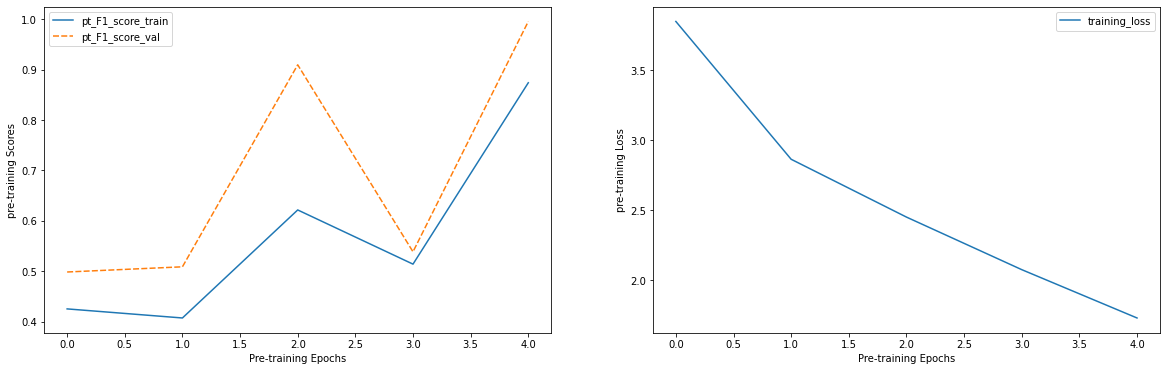

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


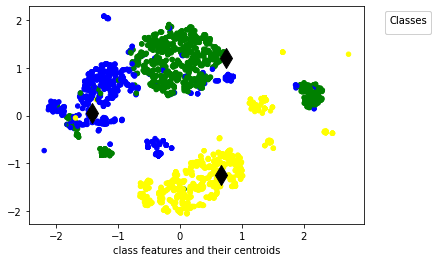

run_id:  2023-03-16_16_34_56.558226_62cae9b8c3ea11edb5aaac8247733f47
unknown optimizer None. assigning default as adam with lr_rate=0.18


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:16<00:00,  6.96it/s]


InvalidArgumentError: params must be at least 1 dimensional [Op:GatherV2]

In [7]:
# res = oset.ptmodel_custom_train(train_data=train_data, val_data=val_data,
#                  test_data=test_data, bglog=bglog, 
#                  manual_color_map=True, centroid_black=True,                               
#                  tsne_n_iter=2000, tsne_perplexity=8,
#                  embedding_size=12, oc_lr=2.5, pt_epochs=5, oc_epochs=2,
#                 save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=False,
#                                halpha=0.7, hbeta=1.5, batch_normalize=True )
res = oset.train(train_data=train_data, val_data=val_data, test_data=test_data, bglog=bglog, designated_ukc_cls=5,
                 manual_color_map=True, centroid_black=True,tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, save_ptmodel=False, halpha=0.7, hbeta=1.2, batch_normalize=True, ptmodel_vhm=True,
                plot_ptmodel_centroid=True, pt_epochs=5,
                oc_lr=0.18, oc_epochs=5, oc_wait=5, oc_centroid_plot=True,
                save_ocmodel=False, pt_retrain=False)

extracting all the values from your input parameter
got all the dataset
extracting all the values from your input parameter
vocab_size: 50
2022-05-11 18:33:11.121874
starting to create ptmodel automatically
epoch: 1/5, train_loss: 2.766613483428955, train_acc: 55.61, F1_train: 0.4517 val_loss: 2.766613483428955, val_acc: 64.06,, F1_val: 0.5361
epoch: 2/5, train_loss: 1.955941915512085, train_acc: 71.43, F1_train: 0.7055 val_loss: 1.955941915512085, val_acc: 97.54,, F1_val: 0.9754
epoch: 3/5, train_loss: 1.609831690788269, train_acc: 67.16, F1_train: 0.6765 val_loss: 1.609831690788269, val_acc: 94.64,, F1_val: 0.9452
train score not improving  going to wait state 1
val score not improving  going to wait state 1
epoch: 4/5, train_loss: 1.4114065170288086, train_acc: 87.67, F1_train: 0.8766 val_loss: 1.4114065170288086, val_acc: 99.78,, F1_val: 0.9978
epoch: 5/5, train_loss: 1.311205506324768, train_acc: 90.68, F1_train: 0.9065 val_loss: 1.311205506324768, val_acc: 100.0,, F1_val: 1.0
run

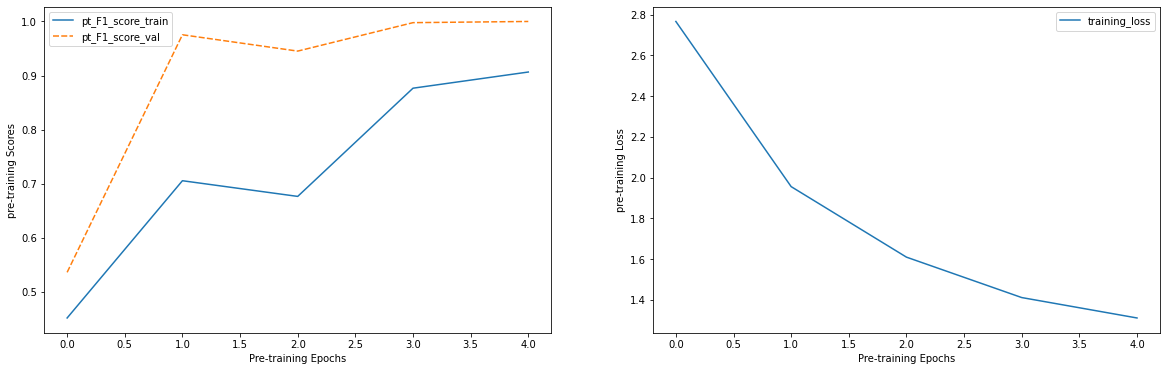

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


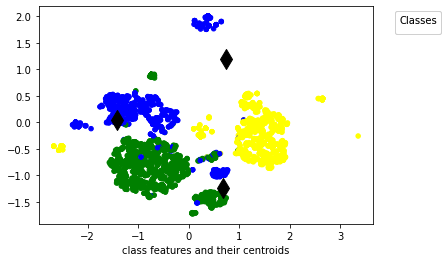

run_id:  2022-05-11_18_34_24.656357_e1ab22fad12a11ecb558ac8247733f47
unknown optimizer None. assigning default as adam with lr_rate=0.18


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.55it/s]


epoch: 1/5, train_loss: 0.6326146721839905, F1_train: 0.2795498300898839 F1_val: 0.30476464779460166,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.53it/s]


epoch: 2/5, train_loss: 0.6330334544181824, F1_train: 0.5111083387856323 F1_val: 0.6659483369811093,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.56it/s]


epoch: 3/5, train_loss: 0.6329280138015747, F1_train: 0.5394613199375119 F1_val: 0.6870032811372907,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.60it/s]


epoch: 4/5, train_loss: 0.6321330070495605, F1_train: 0.5570053521956426 F1_val: 0.6993670608975856,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.64it/s]


epoch: 5/5, train_loss: 0.63284832239151, F1_train: 0.566303535629297 F1_val: 0.7034195430379243,  
Best readius assigned as [[1.0446583]
 [1.0810727]
 [1.0494416]]


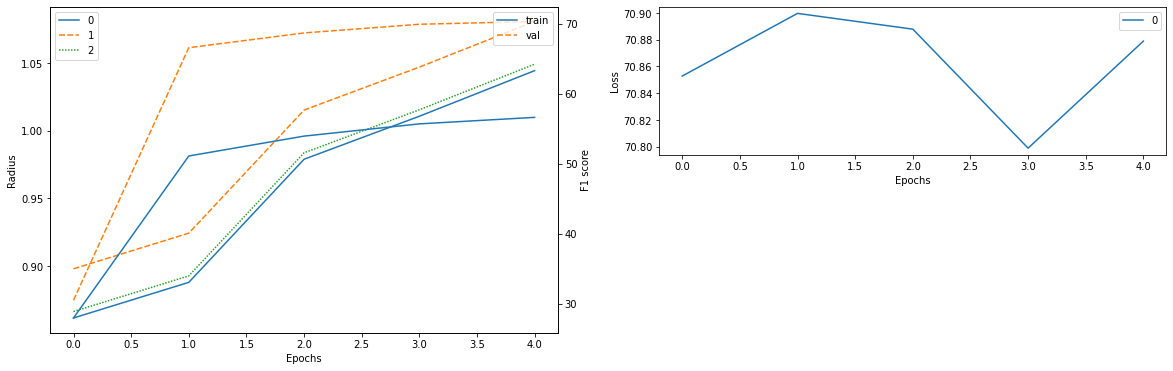

classification report for training:
[[ 804    0    0  388]
 [   5  711    0  481]
 [   0    0   87 1108]
 [   0    0    0    0]]
44.7
f1_weighted: 0.5614354678383584, f1_macro: 0.42115166219615885, f1_micro: 0.44698660714285715, f_measure: {'Known': 56.1536, 'Open': 0, 'F1-score': 42.1152}
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1192
           1       1.00      0.59      0.75      1197
           2       1.00      0.07      0.14      1195
           5       0.00      0.00      0.00         0

    accuracy                           0.45      3584
   macro avg       0.75      0.34      0.42      3584
weighted avg       1.00      0.45      0.56      3584

classification report for test data:
[[129   0   0  15]
 [  0 142   0   0]
 [  0   0  32 115]
 [ 13   0   0 130]]
75.17
f1_weighted: 0.7234701764515695, f1_macro: 0.7262002729654559, f1_micro: 0.7517361111111112, f_measure: {'Known': 75.3213, 'Open': 64.5161, 'F1-score': 72

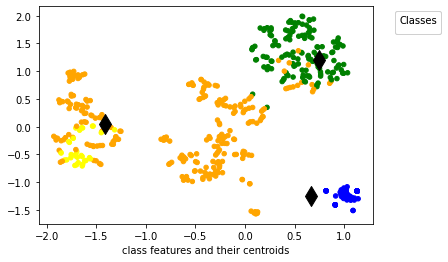

In [6]:
oset = OpenSet()
res = oset.train(train_data=train_data, val_data=val_data, test_data=test_data, bglog=bglog, designated_ukc_cls=5,
                 manual_color_map=True, centroid_black=True,tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, save_ptmodel=False, halpha=0.9, hbeta=0.6, batch_normalize=True, ptmodel_vhm=True,
                plot_ptmodel_centroid=True, pt_epochs=5,
                oc_lr=0.18, oc_epochs=5, oc_wait=5, oc_centroid_plot=True,
                save_ocmodel=False, pt_retrain=False)

extracting all the values from your input parameter
got all the dataset
extracting all the values from your input parameter
vocab_size: 50
2022-05-11 18:38:57.559259
starting to create ptmodel automatically
epoch: 1/10, train_loss: 3.2242209911346436, train_acc: 56.86, F1_train: 0.4579 val_loss: 3.2242209911346436, val_acc: 65.62,, F1_val: 0.5484
epoch: 2/10, train_loss: 2.1770918369293213, train_acc: 54.63, F1_train: 0.4368 val_loss: 2.1770918369293213, val_acc: 63.62,, F1_val: 0.5285
train score not improving  going to wait state 1
val score not improving  going to wait state 1
epoch: 3/10, train_loss: 1.8183931112289429, train_acc: 71.93, F1_train: 0.7158 val_loss: 1.8183931112289429, val_acc: 96.43,, F1_val: 0.9638
epoch: 4/10, train_loss: 1.5689973831176758, train_acc: 78.88, F1_train: 0.7893 val_loss: 1.5689973831176758, val_acc: 97.1,, F1_val: 0.9707
epoch: 5/10, train_loss: 1.4900765419006348, train_acc: 92.05, F1_train: 0.9199 val_loss: 1.4900765419006348, val_acc: 99.55,, F1_

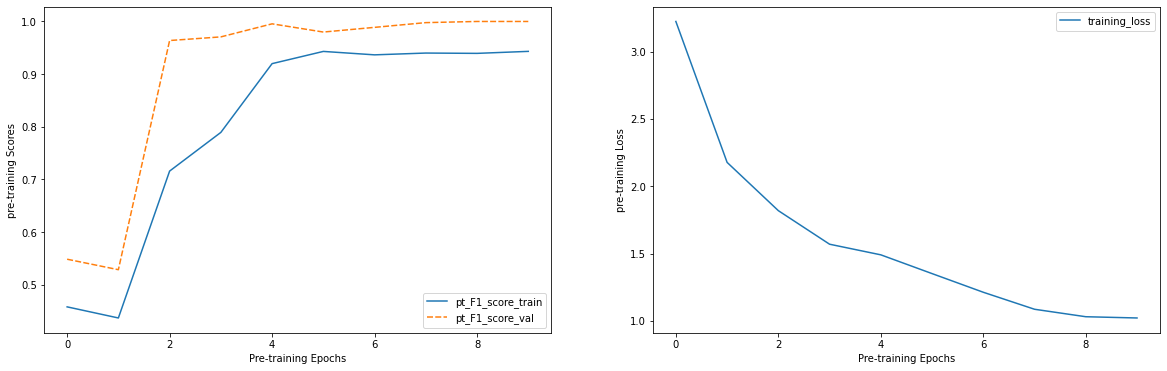

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


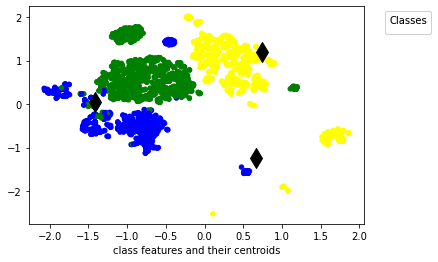

run_id:  2022-05-11_18_41_04.491861_cffd3154d12b11ec98cfac8247733f47
unknown optimizer None. assigning default as adam with lr_rate=0.18


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.51it/s]


epoch: 1/10, train_loss: 0.29464057087898254, F1_train: 0.44665845085333145 F1_val: 0.5782296452094979,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.58it/s]


epoch: 2/10, train_loss: 0.2936151623725891, F1_train: 0.8167728184282916 F1_val: 0.9656235102494836,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.56it/s]


epoch: 3/10, train_loss: 0.29435282945632935, F1_train: 0.8365751102947049 F1_val: 0.9680837541202048,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.57it/s]


epoch: 4/10, train_loss: 0.2943160831928253, F1_train: 0.024375847462996755 F1_val: 0.021601382488479263,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.57it/s]


epoch: 5/10, train_loss: 0.29397210478782654, F1_train: 0.8159702789797342 F1_val: 0.9742033549297194,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.55it/s]


epoch: 6/10, train_loss: 0.29344943165779114, F1_train: 0.5808424904137324 F1_val: 0.6406326722650428,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.50it/s]


epoch: 7/10, train_loss: 0.29322195053100586, F1_train: 0.8639379457182493 F1_val: 0.9777474219944019,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.63it/s]


epoch: 8/10, train_loss: 0.2940743565559387, F1_train: 0.5875404367434863 F1_val: 0.6464002722836646,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.60it/s]


epoch: 9/10, train_loss: 0.29431650042533875, F1_train: 0.5894911484267625 F1_val: 0.6466255681576824,  
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.58it/s]


epoch: 10/10, train_loss: 0.2935161590576172, F1_train: 0.5920376877071964 F1_val: 0.6488623229366157,  
train score not improving  going to wait state 3
val score not improving  going to wait state 3
Best readius assigned as [[0.68837106]
 [0.30564603]
 [0.6931573 ]]


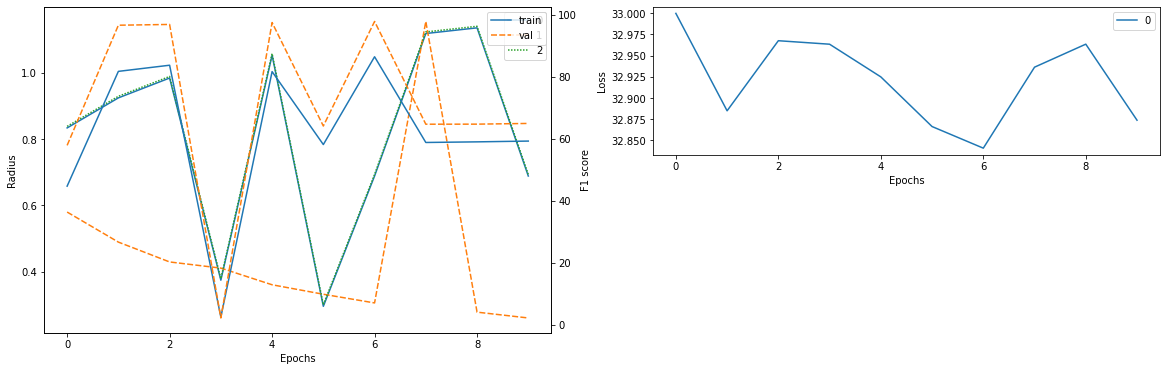

classification report for training:
[[ 617    0    0  577]
 [   0    1    0 1193]
 [   0    0  540  656]
 [   0    0    0    0]]
32.31
f1_weighted: 0.4351660358854703, f1_macro: 0.32629623806159735, f1_micro: 0.32310267857142855, f_measure: {'Known': 43.5062, 'Open': 0, 'F1-score': 32.6296}
              precision    recall  f1-score   support

           0       1.00      0.52      0.68      1194
           1       1.00      0.00      0.00      1194
           2       1.00      0.45      0.62      1196
           5       0.00      0.00      0.00         0

    accuracy                           0.32      3584
   macro avg       0.75      0.24      0.33      3584
weighted avg       1.00      0.32      0.44      3584

classification report for test data:
[[ 92   0   0  53]
 [  0   0   0 142]
 [  0   0  18 126]
 [  2   0   0 143]]
43.92
f1_weighted: 0.3675816619069758, f1_macro: 0.36542975772524183, f1_micro: 0.4392361111111111, f_measure: {'Known': 33.0699, 'Open': 46.9622, 'F1-score': 

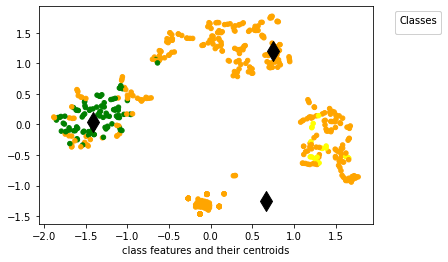

In [7]:
oset = OpenSet()
res = oset.train(train_data=train_data, val_data=val_data, test_data=test_data, bglog=bglog, designated_ukc_cls=5,
                 manual_color_map=True, centroid_black=True,tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, save_ptmodel=False, halpha=0.9, hbeta=0.8, batch_normalize=True, ptmodel_vhm=True,
                plot_ptmodel_centroid=True, pt_epochs=10,
                oc_lr=0.18, oc_epochs=10, oc_wait=5, oc_centroid_plot=True,
                save_ocmodel=False, pt_retrain=False)

extracting all the values from your input parameter
got all the dataset
extracting all the values from your input parameter
vocab_size: 50
2022-05-11 18:45:07.756431
starting to create ptmodel automatically
epoch: 1/10, train_loss: 3.304859161376953, train_acc: 55.92, F1_train: 0.4526 val_loss: 3.304859161376953, val_acc: 64.51,, F1_val: 0.5419
epoch: 2/10, train_loss: 2.4125990867614746, train_acc: 57.23, F1_train: 0.4615 val_loss: 2.4125990867614746, val_acc: 64.73,, F1_val: 0.5437
epoch: 3/10, train_loss: 1.9855273962020874, train_acc: 77.12, F1_train: 0.7551 val_loss: 1.9855273962020874, val_acc: 98.88,, F1_val: 0.9888
epoch: 4/10, train_loss: 1.7237825393676758, train_acc: 87.17, F1_train: 0.8687 val_loss: 1.7237825393676758, val_acc: 99.78,, F1_val: 0.9978
epoch: 5/10, train_loss: 1.469740390777588, train_acc: 93.67, F1_train: 0.9355 val_loss: 1.469740390777588, val_acc: 99.78,, F1_val: 0.9978
epoch: 6/10, train_loss: 1.4142906665802002, train_acc: 94.98, F1_train: 0.9492 val_los

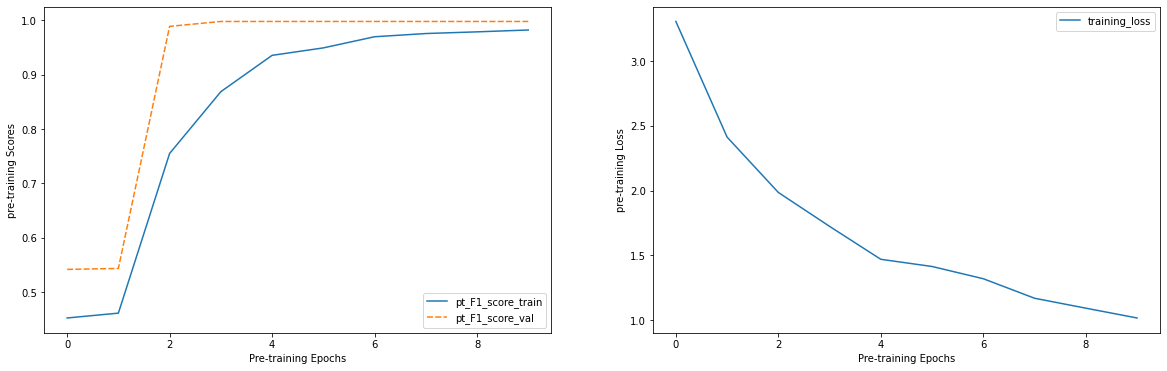

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


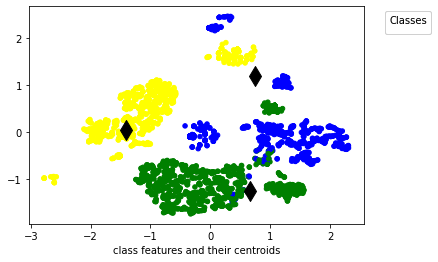

run_id:  2022-05-11_18_47_14.204653_ac5ae346d12c11ec8158ac8247733f47
unknown optimizer None. assigning default as adam with lr_rate=0.18


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.53it/s]


epoch: 1/10, train_loss: 0.3638257682323456, F1_train: 0.2643820221659809 F1_val: 0.28975581709956705,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.50it/s]


epoch: 2/10, train_loss: 0.3644186556339264, F1_train: 0.7938683454381799 F1_val: 0.9524187382351093,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.54it/s]


epoch: 3/10, train_loss: 0.3645206093788147, F1_train: 0.17528000059862706 F1_val: 0.18637853692201517,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.55it/s]


epoch: 4/10, train_loss: 0.3641016185283661, F1_train: 0.1330802972998851 F1_val: 0.13232046850998466,  
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.54it/s]


epoch: 5/10, train_loss: 0.3633803725242615, F1_train: 0.10204443993506493 F1_val: 0.09566326530612244,  
train score not improving  going to wait state 3
val score not improving  going to wait state 3


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.49it/s]


epoch: 6/10, train_loss: 0.36414527893066406, F1_train: 0.8333880896738742 F1_val: 0.95638535797236,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.55it/s]


epoch: 7/10, train_loss: 0.36374884843826294, F1_train: 0.0462280083592535 F1_val: 0.06083950348432055,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.56it/s]


epoch: 8/10, train_loss: 0.3633563816547394, F1_train: 0.028319865355998175 F1_val: 0.04575199645075422,  
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.50it/s]


epoch: 9/10, train_loss: 0.36423614621162415, F1_train: 0.01897457756514658 F1_val: 0.04181735985533454,  
train score not improving  going to wait state 3
val score not improving  going to wait state 3


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.63it/s]


epoch: 10/10, train_loss: 0.36412933468818665, F1_train: 0.015266687141687144 F1_val: 0.033894449499545044,  
train score not improving  going to wait state 4
val score not improving  going to wait state 4
Best readius assigned as [[0.31214055]
 [0.3485563 ]
 [0.31692737]]


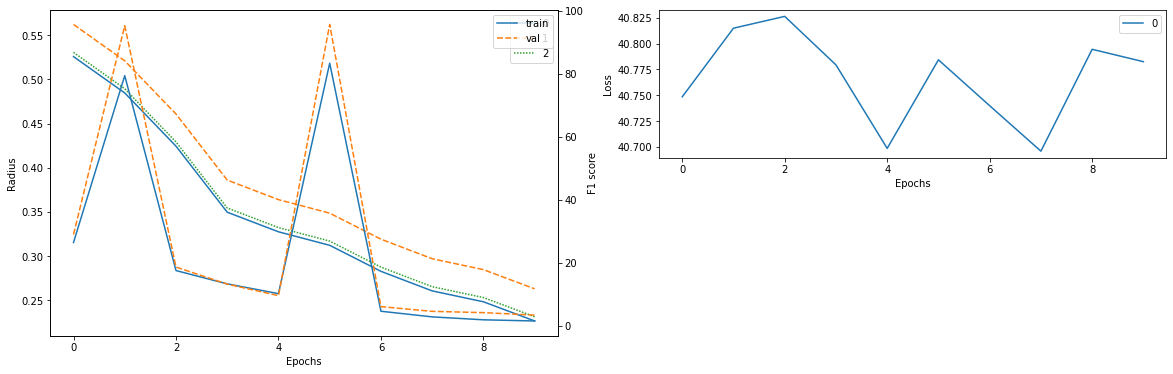

classification report for training:
[[ 205    0    0  989]
 [   0    0    0 1197]
 [   0    0    0 1193]
 [   0    0    0    0]]
5.72
f1_weighted: 0.0976343114980088, f1_macro: 0.07326661901358114, f1_micro: 0.05719866071428571, f_measure: {'Known': 9.7689, 'Open': 0, 'F1-score': 7.3267}
              precision    recall  f1-score   support

           0       1.00      0.17      0.29      1194
           1       0.00      0.00      0.00      1197
           2       0.00      0.00      0.00      1193
           5       0.00      0.00      0.00         0

    accuracy                           0.06      3584
   macro avg       0.25      0.04      0.07      3584
weighted avg       0.33      0.06      0.10      3584

classification report for test data:
[[ 30   0   0 115]
 [  0   0   0 147]
 [  0   0   0 141]
 [  0   0   0 143]]
30.03
f1_weighted: 0.189362458820006, f1_macro: 0.1894878706199461, f1_micro: 0.3003472222222222, f_measure: {'Known': 11.4286, 'Open': 41.5094, 'F1-score': 18.94

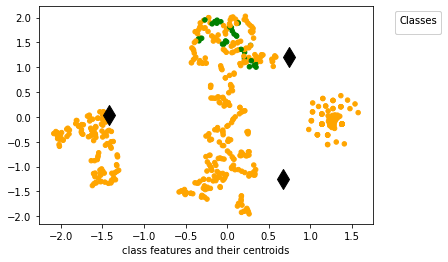

In [8]:
oset = OpenSet()
res = oset.train(train_data=train_data, val_data=val_data, test_data=test_data, bglog=bglog, designated_ukc_cls=5,
                 manual_color_map=True, centroid_black=True,tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, save_ptmodel=False, halpha=0.8, hbeta=0.9, batch_normalize=True, ptmodel_vhm=True,
                plot_ptmodel_centroid=True, pt_epochs=10,
                oc_lr=0.18, oc_epochs=10, oc_wait=5, oc_centroid_plot=True,
                save_ocmodel=False, pt_retrain=False)

extracting all the values from your input parameter
got all the dataset
extracting all the values from your input parameter
vocab_size: 50
2022-05-11 18:56:36.333330
starting to create ptmodel automatically
epoch: 1/10, train_loss: 7.3108439445495605, train_acc: 26.79, F1_train: 0.1862 val_loss: 7.3108439445495605, val_acc: 33.26,, F1_val: 0.2351
epoch: 2/10, train_loss: 5.816979885101318, train_acc: 46.26, F1_train: 0.3704 val_loss: 5.816979885101318, val_acc: 58.71,, F1_val: 0.4849
epoch: 3/10, train_loss: 4.778314590454102, train_acc: 57.17, F1_train: 0.478 val_loss: 4.778314590454102, val_acc: 59.82,, F1_val: 0.5045
epoch: 4/10, train_loss: 4.135900974273682, train_acc: 63.56, F1_train: 0.5949 val_loss: 4.135900974273682, val_acc: 60.04,, F1_val: 0.5206
epoch: 5/10, train_loss: 3.768681049346924, train_acc: 79.35, F1_train: 0.7898 val_loss: 3.768681049346924, val_acc: 81.7,, F1_val: 0.8022
epoch: 6/10, train_loss: 3.367210865020752, train_acc: 72.13, F1_train: 0.699 val_loss: 3.367

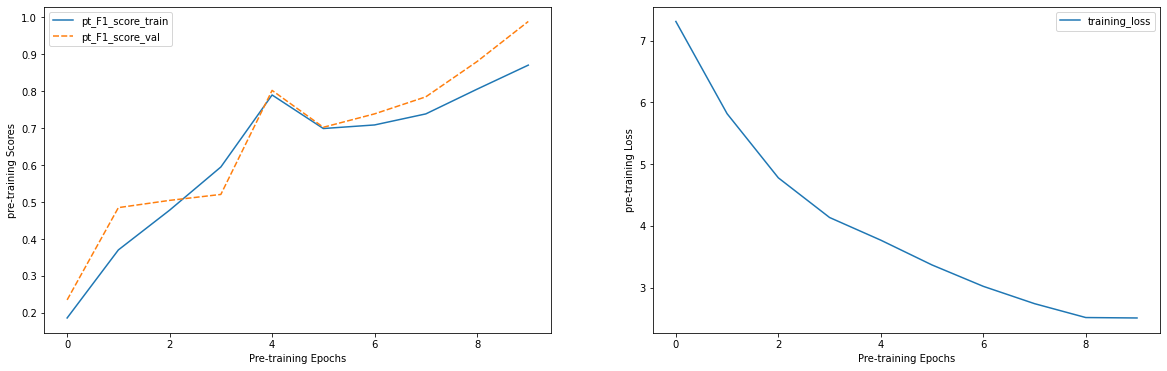

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


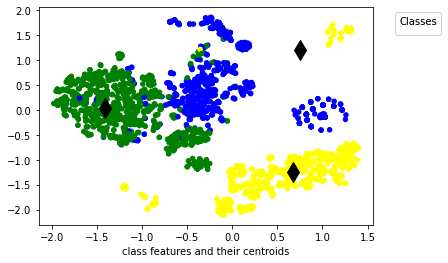

run_id:  2022-05-11_18_58_43.554235_473d4954d12e11eca23cac8247733f47
unknown optimizer None. assigning default as adam with lr_rate=0.36


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.53it/s]


epoch: 1/10, train_loss: 0.28335389494895935, F1_train: 0.8142197714481899 F1_val: 0.9720394827313417,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.56it/s]


epoch: 2/10, train_loss: 0.28280729055404663, F1_train: 0.8440111748981424 F1_val: 0.9757652962423007,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.58it/s]


epoch: 3/10, train_loss: 0.28279241919517517, F1_train: 0.0 F1_val: 0.0,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.58it/s]


epoch: 4/10, train_loss: 0.28306910395622253, F1_train: 0.8601709766434148 F1_val: 0.9830706728447124,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.46it/s]


epoch: 5/10, train_loss: 0.28268736600875854, F1_train: 0.0 F1_val: 0.0,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.40it/s]


epoch: 6/10, train_loss: 0.2827587127685547, F1_train: 0.870692234133869 F1_val: 0.9830690010385209,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.51it/s]


epoch: 7/10, train_loss: 0.2833215594291687, F1_train: 0.8741193566263562 F1_val: 0.9830681108837981,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.55it/s]


epoch: 8/10, train_loss: 0.2823667526245117, F1_train: 0.0 F1_val: 0.0,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.58it/s]


epoch: 9/10, train_loss: 0.28310874104499817, F1_train: 0.0 F1_val: 0.0,  
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.53it/s]


epoch: 10/10, train_loss: 0.28319698572158813, F1_train: 0.881468352639884 F1_val: 0.9876879660756919,  
Best readius assigned as [[-0.2267788 ]
 [-0.19033086]
 [-0.22200066]]


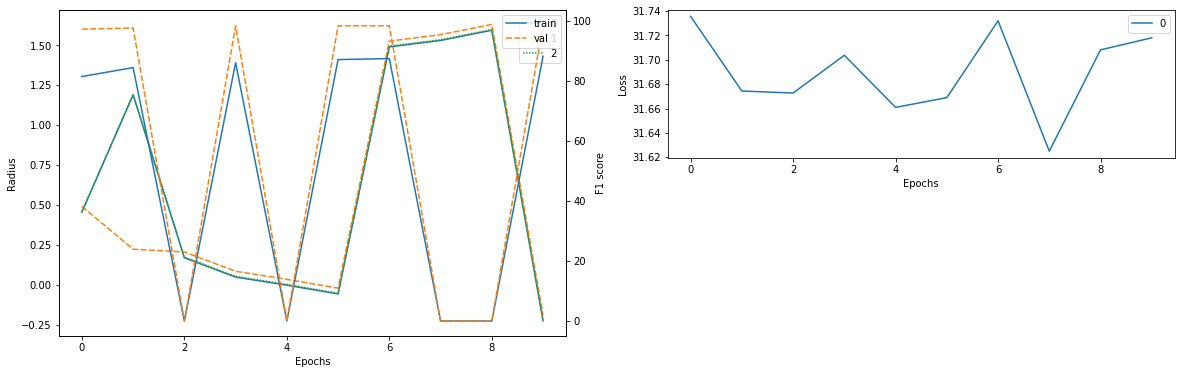

classification report for training:
[[   0    0    0 1194]
 [   0    0    0 1194]
 [   0    0    0 1196]
 [   0    0    0    0]]
0.0
f1_weighted: 0.0, f1_macro: 0.0, f1_micro: 0.0, f_measure: {'Known': 0.0, 'Open': 0, 'F1-score': 0.0}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1194.0
           1       0.00      0.00      0.00    1194.0
           2       0.00      0.00      0.00    1196.0
           5       0.00      0.00      0.00       0.0

    accuracy                           0.00    3584.0
   macro avg       0.00      0.00      0.00    3584.0
weighted avg       0.00      0.00      0.00    3584.0

classification report for test data:
[[  0   0   0 145]
 [  0   0   0 143]
 [  0   0   0 144]
 [  0   0   0 144]]
25.0
f1_weighted: 0.1, f1_macro: 0.1, f1_micro: 0.25, f_measure: {'Known': 0.0, 'Open': 40.0, 'F1-score': 10.0}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      

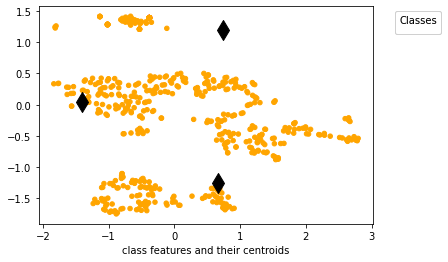

In [10]:
oset = OpenSet()
res = oset.train(train_data=train_data, val_data=val_data, test_data=test_data, bglog=bglog, designated_ukc_cls=5,
                 manual_color_map=True, centroid_black=True,tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, save_ptmodel=False, halpha=1, hbeta=2.5, batch_normalize=True, ptmodel_vhm=True,
                plot_ptmodel_centroid=True, pt_epochs=10,
                oc_lr=0.36, oc_epochs=10, oc_wait=5, oc_centroid_plot=True,
                save_ocmodel=False, pt_retrain=False)

extracting all the values from your input parameter
got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.46it/s]


epoch: 1/10, train_loss: 0.2845410406589508, F1_train: 0.5333624904223415 F1_val: 0.6734966575811273,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.56it/s]


epoch: 2/10, train_loss: 0.2848094403743744, F1_train: 0.8895223997145116 F1_val: 0.9888382902662703,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.54it/s]


epoch: 3/10, train_loss: 0.2847580313682556, F1_train: 0.0 F1_val: 0.0,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.66it/s]


epoch: 4/10, train_loss: 0.284774512052536, F1_train: 0.5342315480375728 F1_val: 0.6712734710136801,  
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.47it/s]


epoch: 5/10, train_loss: 0.28416708111763, F1_train: 0.8892093134275335 F1_val: 0.9888382902662703,  
train score not improving  going to wait state 3
val score not improving  going to wait state 3


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.56it/s]


epoch: 6/10, train_loss: 0.284444123506546, F1_train: 0.8895109085407256 F1_val: 0.9888379332513593,  
train score not improving  going to wait state 4
val score not improving  going to wait state 4


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.55it/s]


epoch: 7/10, train_loss: 0.2845415472984314, F1_train: 0.8891654967791219 F1_val: 0.9888387095995791,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.57it/s]


epoch: 8/10, train_loss: 0.284167617559433, F1_train: 0.8894837795068368 F1_val: 0.9888379332513593,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.54it/s]


epoch: 9/10, train_loss: 0.2841286361217499, F1_train: 0.0 F1_val: 0.0,  
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.55it/s]


epoch: 10/10, train_loss: 0.28465795516967773, F1_train: 0.0 F1_val: 0.0,  
train score not improving  going to wait state 3
val score not improving  going to wait state 3
Best readius assigned as [[0.6779851 ]
 [0.68670166]
 [0.67271024]]


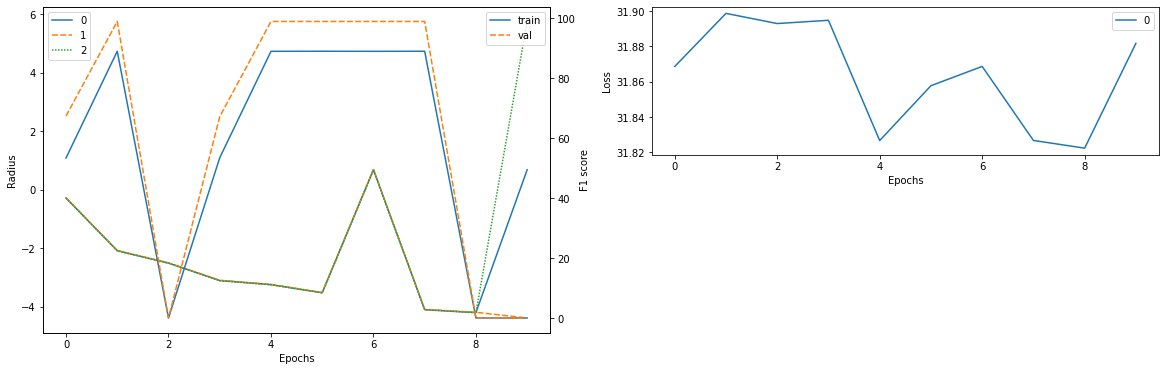

classification report for training:
[[ 940    4    0  251]
 [ 116  628    0  449]
 [   0    0   47 1149]
 [   0    0    0    0]]
45.06
f1_weighted: 0.5327947791694235, f1_macro: 0.39975675803511, f1_micro: 0.4506138392857143, f_measure: {'Known': 53.3009, 'Open': 0, 'F1-score': 39.9757}
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1195
           1       0.99      0.53      0.69      1193
           2       1.00      0.04      0.08      1196
           5       0.00      0.00      0.00         0

    accuracy                           0.45      3584
   macro avg       0.72      0.34      0.40      3584
weighted avg       0.96      0.45      0.53      3584

classification report for test data:
[[133   0   0  12]
 [  0 141   0   0]
 [  0   0  19 125]
 [ 19   3   0 124]]
72.4
f1_weighted: 0.6804076500857436, f1_macro: 0.6818905058814649, f1_micro: 0.7239583333333333, f_measure: {'Known': 70.6075, 'Open': 60.9337, 'F1-score': 68.189

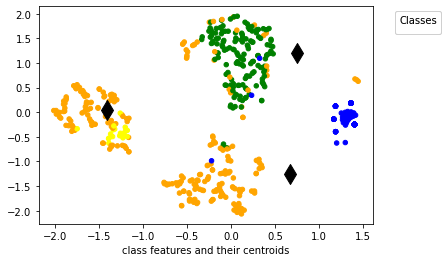

In [11]:
res = oset.train(train_data=train_data, val_data=val_data, test_data=test_data, bglog=bglog, designated_ukc_cls=5,
                 manual_color_map=True, centroid_black=True,tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, save_ptmodel=False, halpha=1, hbeta=2.5, batch_normalize=True, ptmodel_vhm=True,
                plot_ptmodel_centroid=True, pt_epochs=10,
                oc_lr=2, oc_epochs=10, oc_wait=5, oc_centroid_plot=True,
                save_ocmodel=False, pt_retrain=False)

extracting all the values from your input parameter
got all the dataset
extracting all the values from your input parameter
vocab_size: 50
2022-05-11 19:23:34.490171
starting to create ptmodel automatically
epoch: 1/10, train_loss: 1.5201548337936401, train_acc: 56.95, F1_train: 0.4571 val_loss: 1.5201548337936401, val_acc: 66.29,, F1_val: 0.5531
epoch: 2/10, train_loss: 0.639983057975769, train_acc: 57.84, F1_train: 0.472 val_loss: 0.639983057975769, val_acc: 66.74,, F1_val: 0.5565
epoch: 3/10, train_loss: 0.5463762283325195, train_acc: 81.58, F1_train: 0.8034 val_loss: 0.5463762283325195, val_acc: 99.78,, F1_val: 0.9978
epoch: 4/10, train_loss: 0.4308125674724579, train_acc: 87.14, F1_train: 0.8658 val_loss: 0.4308125674724579, val_acc: 100.0,, F1_val: 1.0
epoch: 5/10, train_loss: 0.30279412865638733, train_acc: 95.28, F1_train: 0.9524 val_loss: 0.30279412865638733, val_acc: 100.0,, F1_val: 1.0
epoch: 6/10, train_loss: 0.231903076171875, train_acc: 97.29, F1_train: 0.9729 val_loss: 0

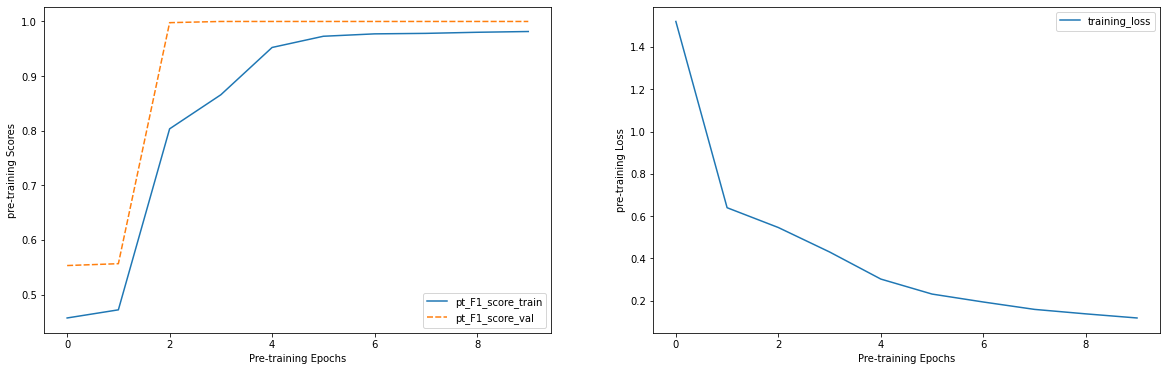

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


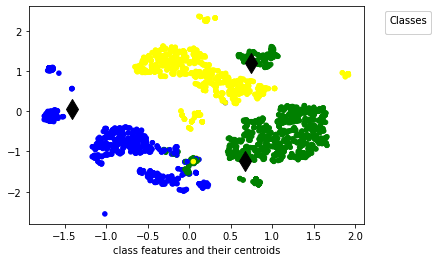

run_id:  2022-05-11_19_25_42.144379_0bfe8ad3d13211ec94c7ac8247733f47
unknown optimizer None. assigning default as adam with lr_rate=0.1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.50it/s]


epoch: 1/10, train_loss: 2.2542595863342285, F1_train: 0.009353324232585596 F1_val: 0.021596706864564004,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.49it/s]


epoch: 2/10, train_loss: 2.2531373500823975, F1_train: 0.012055219442165711 F1_val: 0.03788991862567812,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.53it/s]


epoch: 3/10, train_loss: 2.2566781044006348, F1_train: 0.01579867204867205 F1_val: 0.04185267857142857,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.49it/s]


epoch: 4/10, train_loss: 2.2537474632263184, F1_train: 0.01844789727780363 F1_val: 0.05340709903593339,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.50it/s]


epoch: 5/10, train_loss: 2.2544169425964355, F1_train: 0.021595528455284552 F1_val: 0.05713190184049079,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.50it/s]


epoch: 6/10, train_loss: 2.254579782485962, F1_train: 0.0247173819124424 F1_val: 0.053378527336860666,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.46it/s]


epoch: 7/10, train_loss: 2.2551064491271973, F1_train: 0.026266705184887457 F1_val: 0.06445993031358885,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.50it/s]


epoch: 8/10, train_loss: 2.2540547847747803, F1_train: 0.027298660714285713 F1_val: 0.07174744897959183,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.52it/s]


epoch: 9/10, train_loss: 2.254748582839966, F1_train: 0.028834222387037884 F1_val: 0.07169589392643284,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.54it/s]


epoch: 10/10, train_loss: 2.255049467086792, F1_train: 0.03086788137042526 F1_val: 0.07878151260504203,  
Best readius assigned as [[0.94771457]
 [0.9841271 ]
 [0.9524993 ]]


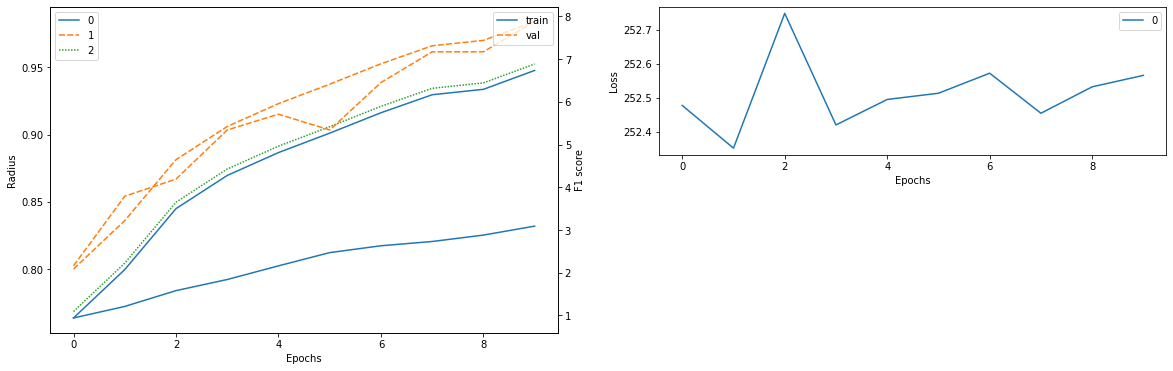

classification report for training:
[[  58    0    0 1138]
 [   0    0    0 1194]
 [   0    0    0 1194]
 [   0    0    0    0]]
1.62
f1_weighted: 0.030869076099339254, f1_macro: 0.023125996810207335, f1_micro: 0.016183035714285716, f_measure: {'Known': 3.0835, 'Open': 0, 'F1-score': 2.3126}
              precision    recall  f1-score   support

           0       1.00      0.05      0.09      1196
           1       0.00      0.00      0.00      1194
           2       0.00      0.00      0.00      1194
           5       0.00      0.00      0.00         0

    accuracy                           0.02      3584
   macro avg       0.25      0.01      0.02      3584
weighted avg       0.33      0.02      0.03      3584

classification report for test data:
[[ 14   0   0 128]
 [  0   0   0 147]
 [  0   0   0 142]
 [  0   0   0 145]]
27.6
f1_weighted: 0.147506669165085, f1_macro: 0.1474177637543974, f1_micro: 0.2760416666666667, f_measure: {'Known': 5.9829, 'Open': 41.0184, 'F1-score': 14.

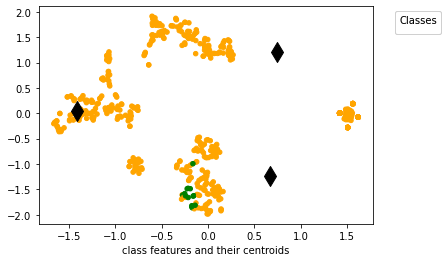

In [14]:
oset = OpenSet()
res = oset.train(train_data=train_data, val_data=val_data, test_data=test_data, bglog=bglog, designated_ukc_cls=5,
                 manual_color_map=True, centroid_black=True,tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, save_ptmodel=False, halpha=1, hbeta=0, batch_normalize=True, ptmodel_vhm=True,
                plot_ptmodel_centroid=True, pt_epochs=10,
                oc_lr=0.1, oc_epochs=10, oc_wait=5, oc_centroid_plot=True,
                save_ocmodel=False, pt_retrain=False)

extracting all the values from your input parameter
got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=0.01


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.59it/s]


epoch: 1/10, train_loss: 2.276585102081299, F1_train: 0.0016699113856068744 F1_val: 0.00881109022556391,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.60it/s]


epoch: 2/10, train_loss: 2.276432514190674, F1_train: 0.0016699008435032304 F1_val: 0.008809523809523809,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.58it/s]


epoch: 3/10, train_loss: 2.2762999534606934, F1_train: 0.0016699253598191981 F1_val: 0.00881109022556391,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.02it/s]


epoch: 4/10, train_loss: 2.2752087116241455, F1_train: 0.0022247023809523806 F1_val: 0.00881031220435194,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.12it/s]


epoch: 5/10, train_loss: 2.276761054992676, F1_train: 0.0022247023809523806 F1_val: 0.00881031220435194,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.15it/s]


epoch: 6/10, train_loss: 2.2775723934173584, F1_train: 0.0027785431311807456 F1_val: 0.00881031220435194,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.48it/s]


epoch: 7/10, train_loss: 2.2762789726257324, F1_train: 0.0027785721713810313 F1_val: 0.00881109022556391,  


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.34it/s]


epoch: 8/10, train_loss: 2.276109218597412, F1_train: 0.002778523690177826 F1_val: 0.00881109022556391,  
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.27it/s]


epoch: 9/10, train_loss: 2.276621103286743, F1_train: 0.0027785528273809525 F1_val: 0.008809523809523809,  
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.63it/s]


epoch: 10/10, train_loss: 2.2757301330566406, F1_train: 0.0027785431311807456 F1_val: 0.00881109022556391,  
train score not improving  going to wait state 3
val score not improving  going to wait state 3
Best readius assigned as [[0.70089716]
 [0.7096136 ]
 [0.69562215]]


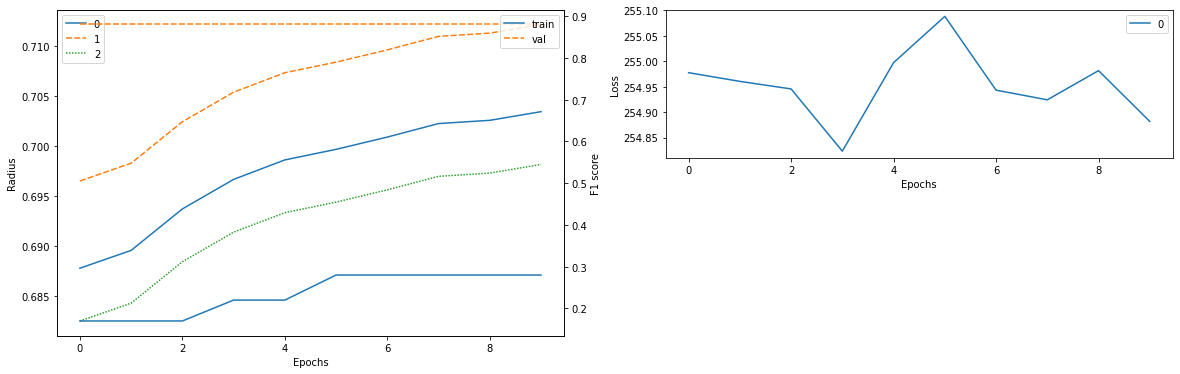

classification report for training:
[[   5    0    0 1192]
 [   0    0    0 1195]
 [   0    0    0 1192]
 [   0    0    0    0]]
0.14
f1_weighted: 0.0027785721713810313, f1_macro: 0.0020798668885191347, f1_micro: 0.0013950892857142857, f_measure: {'Known': 0.2773, 'Open': 0, 'F1-score': 0.208}
              precision    recall  f1-score   support

           0       1.00      0.00      0.01      1197
           1       0.00      0.00      0.00      1195
           2       0.00      0.00      0.00      1192
           5       0.00      0.00      0.00         0

    accuracy                           0.00      3584
   macro avg       0.25      0.00      0.00      3584
weighted avg       0.33      0.00      0.00      3584

classification report for test data:
[[  0   0   0 144]
 [  0   0   0 146]
 [  0   0   0 143]
 [  0   0   0 143]]
24.83
f1_weighted: 0.09875309071240922, f1_macro: 0.09944367176634215, f1_micro: 0.2482638888888889, f_measure: {'Known': 0.0, 'Open': 39.7775, 'F1-score': 

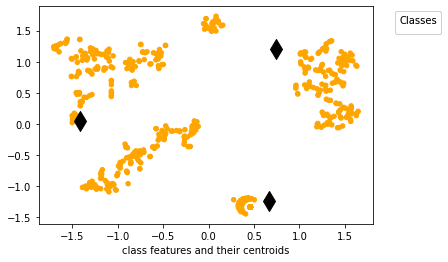

In [15]:
res = oset.train(train_data=train_data, val_data=val_data, test_data=test_data, bglog=bglog, designated_ukc_cls=5,
                 manual_color_map=True, centroid_black=True,tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, save_ptmodel=False, halpha=1, hbeta=0, batch_normalize=True, ptmodel_vhm=True,
                plot_ptmodel_centroid=True, pt_epochs=10,
                oc_lr=0.01, oc_epochs=10, oc_wait=5, oc_centroid_plot=True,
                save_ocmodel=False, pt_retrain=False)